# Time to completion

In [1]:
suppressMessages(library(tidyverse))

my_db <- src_postgres("donorschoose")
projects_tbl <- tbl(my_db, "projects")
 

In [28]:
duration <- projects_tbl %>% 
  filter(date_posted > "2010-08-01", date_posted < "2010-10-01")  %>% 
  filter(funding_status == "completed")  %>% 
  collect()  %>% 
  mutate(days_to_complete = as.numeric(date_completed - date_posted)/(60*60*24))  %>% 
#  mutate(days_to_expire = as.numeric(date_expiration - date_posted)/(60*60*24))  
  mutate(days_to_expire = as.numeric(date_expiration - date_posted))  


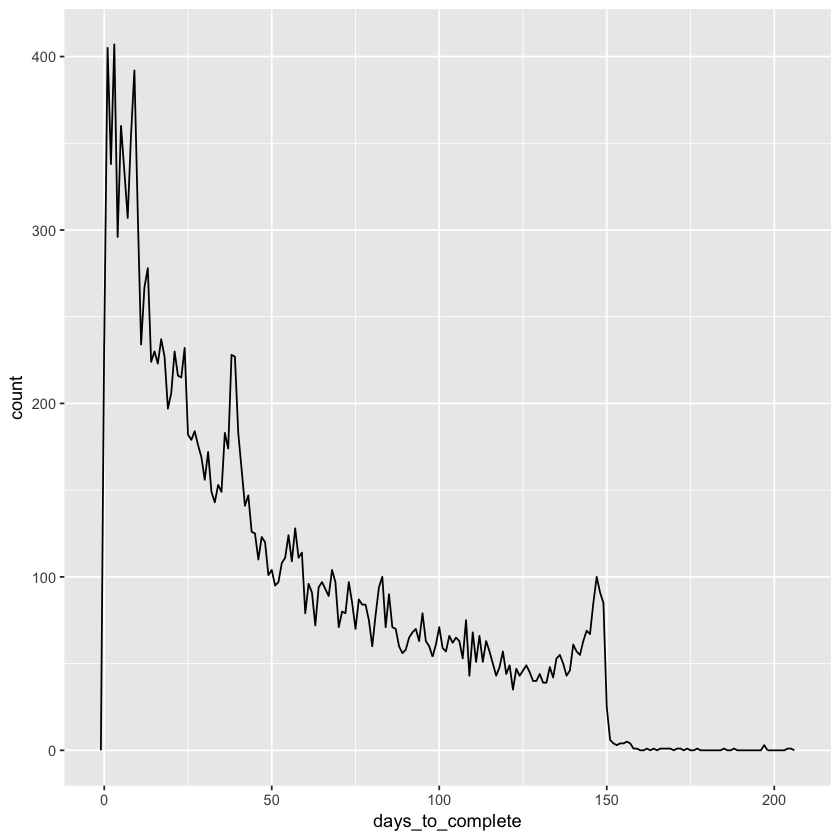

In [29]:
duration  %>% 
  ggplot(aes(days_to_complete)) +
  geom_freqpoly(binwidth = 1)

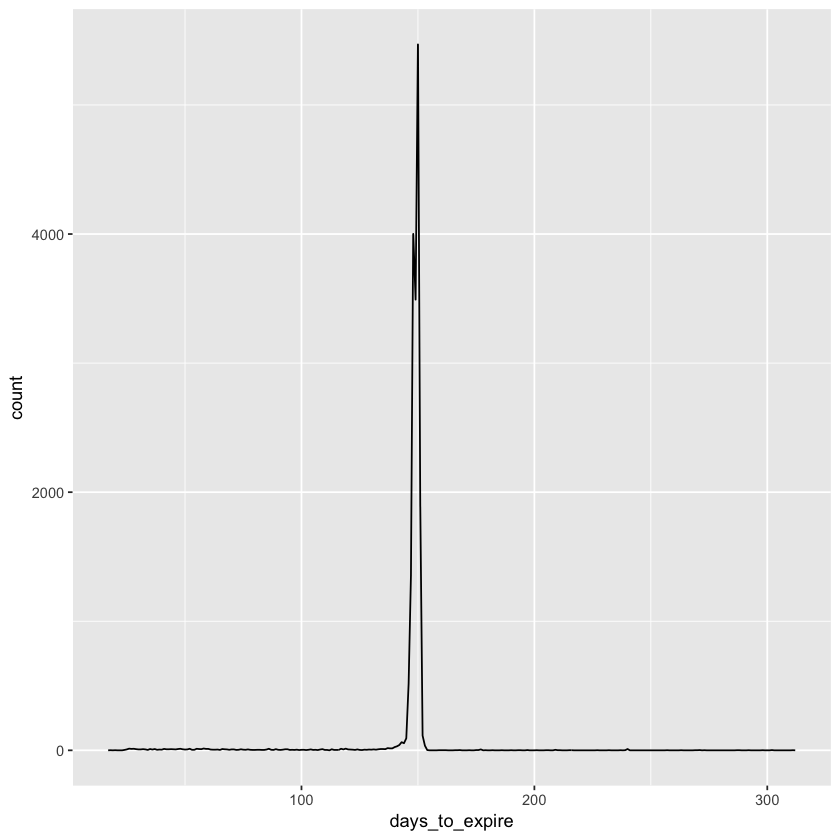

In [30]:
duration  %>% 
  ggplot(aes(days_to_expire)) +
  geom_freqpoly(binwidth = 1)

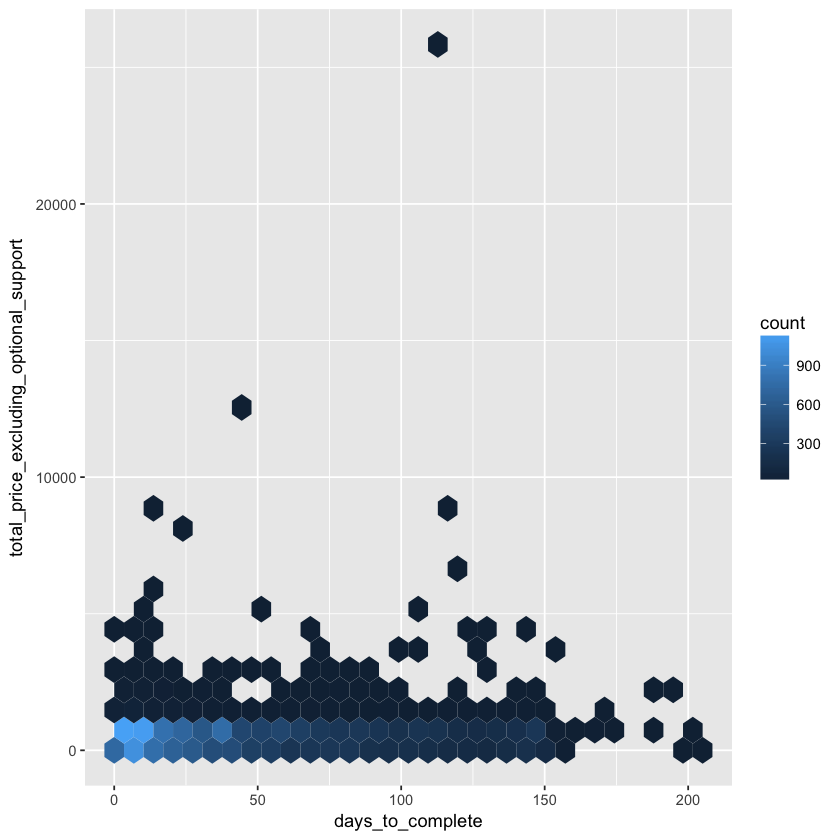

In [34]:
duration  %>% 
  ggplot(aes(days_to_complete, total_price_excluding_optional_support)) +
  geom_hex()

In [31]:
names(duration)

[1] "_projectid"                            
 [2] "_teacher_acctid"                       
 [3] "_schoolid"                             
 [4] "school_ncesid"                         
 [5] "school_latitude"                       
 [6] "school_longitude"                      
 [7] "school_city"                           
 [8] "school_state"                          
 [9] "school_zip"                            
[10] "school_metro"                          
[11] "school_district"                       
[12] "school_county"                         
[13] "school_charter"                        
[14] "school_magnet"                         
[15] "school_year_round"                     
[16] "school_nlns"                           
[17] "school_kipp"                           
[18] "school_charter_ready_promise"          
[19] "teacher_prefix"                        
[20] "teacher_teach_for_america"             
[21] "teacher_ny_teaching_fellow"            
[22] "primary_focus_subject"                 
[23] "primary_focus_area"                    
[24] "secondary_focus_subject"               
[25] "secondary_focus_area"                  
[26] "resource_type"                         
[27] "poverty_level"                         
[28] "grade_level"                           
[29] "vendor_shipping_charges"               
[30] "sales_tax"                             
[31] "payment_processing_charges"            
[32] "fulfillment_labor_materials"           
[33] "total_price_excluding_optional_support"
[34] "total_price_including_optional_support"
[35] "students_reached"                      
[36] "total_donations"                       
[37] "num_donors"                            
[38] "eligible_double_your_impact_match"     
[39] "eligible_almost_home_match"            
[40] "funding_status"                        
[41] "date_posted"                           
[42] "date_completed"                        
[43] "date_thank_you_packet_mailed"          
[44] "date_expiration"                       
[45] "days_to_complete"                      
[46] "days_to_expire"

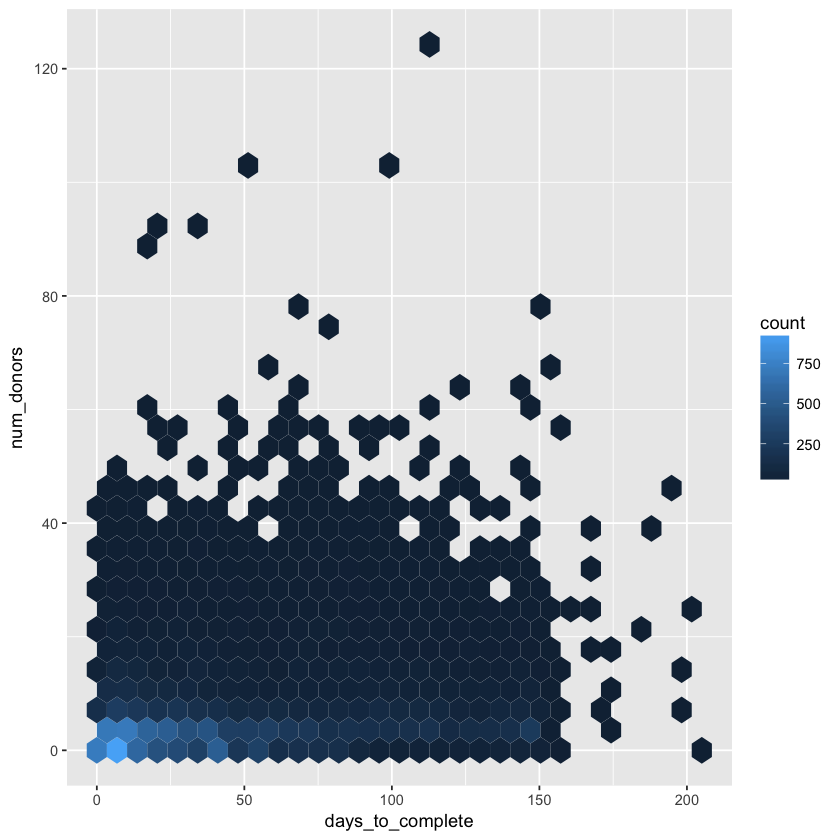

In [35]:
duration  %>% 
  ggplot(aes(days_to_complete, num_donors)) +
  geom_hex()